# 안녕하세요^^ 
## AIVLE 2차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정 2번 파일입니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## [프로젝트 흐름]

0.튜토리얼에서 주민등록 데이터를 함께 전처리/체험 해 봅니다.

1.서울시 버스 정류장 데이터를 전처리/분석 합니다.

### 2.서울시 유동인구 데이터를 전처리/분석 합니다.

3.서울시 주민등록 데이터를 전처리/분석 합니다.

4.서울시 업종등록 데이터를 전처리/분석 합니다.

5.위 4개 데이터를 합쳐서 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.



* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 생활이동_자치구_2022.12_00~24시.csv

* 생활이동_자치구_2022.12_00시.csv 데이터는 버스에서 하차한 시간이 0시 0분 ~ 0시 59분인 경우의 데이터입니다.
* 생활이동_자치구_2022.12_13시.csv 데이터는 버스에서 하차한 시간이 13시 0분 ~ 13시 59분인 경우의 데이터입니다.

[데이터 소개]
*  2022년 12월 서울시 구별 이동인원 데이터

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 0시~24시 엑셀을 합친 데이터프레임을 만들어볼게요.
    * 주어진 소스코드를 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다. 약 2분 내외의 시간이 소요됩니다.
import pandas as pd
from glob import glob
file_names = glob("rawdata/seoul_moving/*.csv") 
total = pd.DataFrame()

for file_name in file_names:
    temp = pd.read_csv(file_name, sep = ',', encoding='cp949')
    total = pd.concat([total, temp])

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
total.shape

(29558734, 10)

In [4]:
total.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202212,일,0,11010,11010,F,0,EE,27,83.82
1,202212,일,0,11010,11010,F,10,EH,75,17.68
2,202212,일,0,11010,11010,F,10,HH,59,11.8
3,202212,일,0,11010,11010,F,10,WW,66,6
4,202212,일,0,11010,11010,F,10,EE,96,11.92


---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'total' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202212,일,0,11010,11010,F,0,EE,27,83.82
1,202212,일,0,11010,11010,F,10,EH,75,17.68
2,202212,일,0,11010,11010,F,10,HH,59,11.8
3,202212,일,0,11010,11010,F,10,WW,66,6
4,202212,일,0,11010,11010,F,10,EE,96,11.92


* 1번 열의 의미
    * " 2022년 12월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 H(야간상주지(집))으로 이동한 0 ~ 10세 여성은 총 17.68명이며 이들의 평균 이동시간은 75분이다

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29558734 entries, 0 to 1016071
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.4+ GB


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,29558734.0,2.955873e+07,2.955873e+07,2.955873e+07,2.955873e+07,2.955873e+07
mean,202212.0,1.367634e+01,1.709611e+04,1.719035e+04,4.253275e+01,9.532969e+01
std,0.0,5.868597e+00,9.023087e+03,9.045166e+03,1.781539e+01,8.109942e+01
min,202212.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+00
25%,202212.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,4.900000e+01
50%,202212.0,1.400000e+01,1.120000e+04,1.120000e+04,4.000000e+01,7.500000e+01
75%,202212.0,1.800000e+01,3.101400e+04,3.101400e+04,5.500000e+01,1.130000e+02
max,202212.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,5.078000e+03


#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '인구이동(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? 

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)

    - 해당 값을 나름의 기준으로 변경하세요

    - '인구이동(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total['이동인구(합)'].value_counts()

*          3934897
6.05        406871
3.3         398735
3.29        290353
3.31        235255
            ...   
565.04           1
709.52           1
686.85           1
1812.57          1
740.17           1
Name: 이동인구(합), Length: 138998, dtype: int64

In [9]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
total.replace("*", "1.5", inplace=True)

In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total['이동인구(합)'].value_counts()

1.5        3934897
6.05        406871
3.3         398735
3.29        290353
3.31        235255
            ...   
565.04           1
709.52           1
686.85           1
1812.57          1
740.17           1
Name: 이동인구(합), Length: 138998, dtype: int64

In [11]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
total = total.astype({'이동인구(합)' : 'float'})


In [12]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29558734 entries, 0 to 1016071
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total['이동유형'].value_counts()

EH    5939025
HE    5667459
EE    5260549
WH    3128038
WE    2828357
HW    2730192
EW    2320634
WW    1030463
HH     654017
Name: 이동유형, dtype: int64

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total['요일'].value_counts()

금    4706484
토    4705795
목    4441304
화    3982479
수    3955721
월    3945340
일    3821611
Name: 요일, dtype: int64

* 12월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 5, 금 : 5, 토 : 5

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

total['성별'].value_counts()


M    16606573
F    12952161
Name: 성별, dtype: int64

#### [실습문제5] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다!

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total = total[(total["출발 시군구 코드"] < 20000) & (total["도착 시군구 코드"] < 20000)]
total

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202212,일,0,11010,11010,F,0,EE,27,83.82
1,202212,일,0,11010,11010,F,10,EH,75,17.68
2,202212,일,0,11010,11010,F,10,HH,59,11.80
3,202212,일,0,11010,11010,F,10,WW,66,6.00
4,202212,일,0,11010,11010,F,10,EE,96,11.92
...,...,...,...,...,...,...,...,...,...,...
968417,202212,토,23,11250,11250,M,80,WW,10,9.52
968418,202212,토,23,11250,11250,M,80,WH,34,19.03
968419,202212,토,23,11250,11250,M,80,HW,55,9.46
968420,202212,토,23,11250,11250,M,80,EH,193,28.29


#### [실습문제6] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total.groupby(by=['출발 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values(by = '이동인구(합)', ascending = False)

,출발 시군구 코드,이동인구(합)
22,11230,49045093.19
23,11240,37720320.64
21,11220,31478168.87
18,11190,26989084.79
13,11140,25667689.76
15,11160,23975801.32
24,11250,22968871.95
1,11020,22456928.81
10,11110,21435324.09
0,11010,21143351.30


#### [실습문제7] '도착 시군구 코드' 를 기준으로 각 구별로 이동인구(합)을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total.groupby(by=['도착 시군구 코드'], as_index = False)['이동인구(합)'].sum().sort_values(by = '이동인구(합)', ascending = False)

,도착 시군구 코드,이동인구(합)
22,11230,48940779.91
23,11240,37668693.82
21,11220,31568695.73
18,11190,26938651.07
13,11140,25683914.30
15,11160,24207692.63
24,11250,22933052.84
1,11020,22491167.48
10,11110,21427712.90
0,11010,21031880.41


#### [실습문제8] '도착 시군구 코드' 를 기준으로 각 구별로 '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

# 각 구별 이동인구의 평균 정보가 있는 데이터프레임을 만듭니다.
total_mean = total.groupby(by=['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)','이동인구(합)']].mean()

# 각 구별 이동인구의 합계 정보가 있는 데이터프레임을 만듭니다.
total_sum = total.groupby(by=['도착 시군구 코드'], as_index = False)[['평균 이동 시간(분)','이동인구(합)']].sum()

# 컬럼명을 맞게 변경합니다.
total_sum.rename(columns={"평균 이동 시간(분)":'총 이동 시간', '이동인구(합)':'총 이동 인구'},inplace=True)

In [20]:
# 파일을 합쳐볼까요
df_total = pd.merge(total_sum, total_mean, how = 'inner', on = '도착 시군구 코드')
df_total

,도착 시군구 코드,총 이동 시간,총 이동 인구,평균 이동 시간(분),이동인구(합)
0,11010,29797989,21031880.41,60.903702,42.986773
1,11020,29871978,22491167.48,59.909546,45.107011
2,11030,27170933,15702426.81,59.739050,34.523955
3,11040,27556207,18138400.81,59.495957,39.162194
4,11050,27336591,18876549.38,62.520935,43.172154
5,11060,28861672,18143542.26,61.684211,38.777036
6,11070,25502247,14809957.70,65.605698,38.099294
7,11080,28796293,20096899.66,61.968824,43.247971
8,11090,24756229,13182652.17,67.274921,35.823787
9,11100,22523029,11173779.54,69.232395,34.346514


In [21]:
# 해당 데이터프레임을 'df_seoul_moving.csv' 파일로 저장하세요
df_total.to_csv('df_seoul_moving.csv')

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

#### [실습문제10] 가장 버스 이용승객이 많은 요일을 찾아보세요


In [22]:
total.groupby(by=['요일'], as_index = False)[['이동인구(합)']].sum()

,요일,이동인구(합)
0,금,92745157.41
1,목,90142324.06
2,수,71122031.19
3,월,71131120.53
4,일,51420671.55
5,토,76926082.67
6,화,73094160.82


#### [실습문제11] 데이터 분포 알아보기
* 다양한 변수를 기준으로 데이터를 분석하고 인사이트를 도출해보세요.

일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 5, 금 : 5, 토 : 5[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지), E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [23]:
total["출발 시군구 코드"] = total["출발 시군구 코드"].map({
     11010:'종로구',
     11020:'중구',
     11030:'용산구',
     11040:'성동구',
     11050:'광진구',
     11060:'동대문구',
     11070:'중랑구',
     11080:'성북구',
     11090:'강북구',
     11100:'도봉구',
     11110:'노원구',
     11120:'은평구',
     11130:'서대문구',
     11140:'마포구',
     11150:'양천구',
     11160:'강서구',
     11170:'구로구',
     11180:'금천구',
     11190:'영등포구',
     11200:'동작구',
     11210:'관악구',
     11220:'서초구',
     11230:'강남구',
     11240:'송파구',
    11250:'강동구'})

total["도착 시군구 코드"] = total["도착 시군구 코드"].map({
     11010:'종로구',
     11020:'중구',
     11030:'용산구',
     11040:'성동구',
     11050:'광진구',
     11060:'동대문구',
     11070:'중랑구',
     11080:'성북구',
     11090:'강북구',
     11100:'도봉구',
     11110:'노원구',
     11120:'은평구',
     11130:'서대문구',
     11140:'마포구',
     11150:'양천구',
     11160:'강서구',
     11170:'구로구',
     11180:'금천구',
     11190:'영등포구',
     11200:'동작구',
     11210:'관악구',
     11220:'서초구',
     11230:'강남구',
     11240:'송파구',
    11250:'강동구'})

In [24]:
total['나이대'] = '10대'

In [25]:
total.loc[total['나이'].between(20,39), ['나이대']] = '20 ~ 30대'
total.loc[total['나이'].between(40,59), ['나이대']] = '40 ~ 50대'
total.loc[total['나이'].between(60,100), ['나이대']] = '60대 이상'

In [26]:
total

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),나이대
0,202212,일,0,종로구,종로구,F,0,EE,27,83.82,10대
1,202212,일,0,종로구,종로구,F,10,EH,75,17.68,10대
2,202212,일,0,종로구,종로구,F,10,HH,59,11.80,10대
3,202212,일,0,종로구,종로구,F,10,WW,66,6.00,10대
4,202212,일,0,종로구,종로구,F,10,EE,96,11.92,10대
...,...,...,...,...,...,...,...,...,...,...,...
968417,202212,토,23,강동구,강동구,M,80,WW,10,9.52,60대 이상
968418,202212,토,23,강동구,강동구,M,80,WH,34,19.03,60대 이상
968419,202212,토,23,강동구,강동구,M,80,HW,55,9.46,60대 이상
968420,202212,토,23,강동구,강동구,M,80,EH,193,28.29,60대 이상


In [27]:
# 일 : 4, 월 : 4, 화 : 4, 수 : 4, 목 : 5, 금 : 5, 토 : 5

In [28]:
import seaborn as sns

In [29]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [52]:
total.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),나이대
0,202212,일,0,종로구,종로구,F,0,EE,27,83.82,10대
1,202212,일,0,종로구,종로구,F,10,EH,75,17.68,10대
2,202212,일,0,종로구,종로구,F,10,HH,59,11.80,10대
3,202212,일,0,종로구,종로구,F,10,WW,66,6.00,10대
4,202212,일,0,종로구,종로구,F,10,EE,96,11.92,10대


In [121]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('rawdata/1.3 업종등록 데이터.csv',sep = ',', encoding = 'UTF-8')

In [122]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business_copy = seoul_business.copy()
seoul_business = seoul_business.drop('동', axis = 1)

In [123]:
seoul_business_copy = seoul_business_copy[(seoul_business_copy['동'] == '합계') | (seoul_business_copy['동'] == '소계')]
seoul_business_copy.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
21,중구,소계,230,235,"1,588","6,414",300,333,576,"1,152",...,869,"3,542","10,810","24,248",381,982,57,175,443,"2,121"
37,용산구,소계,416,523,857,"2,987",455,466,791,"1,214",...,634,"2,076",54,317,487,"1,332",104,573,300,"1,184"
54,성동구,소계,"1,200","2,527",956,"2,785","1,072","1,161",801,"1,453",...,547,"1,859",149,"1,572",285,621,258,"1,494",400,"1,545"


In [124]:
seoul_business_copy.set_index('자치구', inplace = True)

In [125]:
seoul_business_copy.drop('동', axis = 1, inplace = True)

In [126]:
for i in seoul_business_copy.columns:
    seoul_business_copy[i] = seoul_business_copy[i].str.replace(',','') #.1이면 종사자, 아니면 사업체
    seoul_business_copy[i] = seoul_business_copy[i].str.replace('-','0')
    seoul_business_copy[i] = seoul_business_copy[i].astype('int')

In [127]:
seoul_business_copy.columns = ['택시운송업 - 사업체','택시운송업 - 종사자',	'한식 일반 음식점업 - 사업체',	'한식 일반 음식점업 - 종사자',
                               '용달 화물자동차 운송업 - 사업체',	'용달 화물자동차 운송업 - 종사자',	'부동산 중개 및 대리업 - 사업체',	'부동산 중개 및 대리업 - 종사자',
                               '두발미용업 - 사업체',	'두발미용업 - 종사자',	'커피전문점 - 사업체',	'커피전문점 - 종사자',	'남녀용 겉옷 및 셔츠 도매업 - 사업체',	
                               '남녀용 겉옷 및 셔츠 도매업 - 종사자',	'기타주점업 - 사업체',	'기타주점업 - 종사자',	'일반 교과 학원 - 사업체',	'일반 교과 학원 - 종사자',
                               '한식 육류요리 전문점 - 사업체',	'한식 육류요리 전문점 - 종사자']

In [128]:
seoul_business_copy.reset_index(drop = False, inplace = True)

In [129]:
seoul_business_copy['택시운송업 - 사업체'] = seoul_business_copy['택시운송업 - 사업체'] / seoul_business_copy['택시운송업 - 사업체'][0] * 100
seoul_business_copy['택시운송업 - 종사자'] = seoul_business_copy['택시운송업 - 종사자'] / seoul_business_copy['택시운송업 - 종사자'][0] * 100
seoul_business_copy['한식 일반 음식점업 - 사업체'] = seoul_business_copy['한식 일반 음식점업 - 사업체'] / seoul_business_copy['한식 일반 음식점업 - 사업체'][0] * 100
seoul_business_copy['한식 일반 음식점업 - 종사자'] = seoul_business_copy['한식 일반 음식점업 - 종사자'] / seoul_business_copy['한식 일반 음식점업 - 종사자'][0] * 100
seoul_business_copy['부동산 중개 및 대리업 - 사업체'] = seoul_business_copy['부동산 중개 및 대리업 - 사업체'] / seoul_business_copy['부동산 중개 및 대리업 - 사업체'][0] * 100
seoul_business_copy['부동산 중개 및 대리업 - 종사자'] = seoul_business_copy['부동산 중개 및 대리업 - 종사자'] / seoul_business_copy['부동산 중개 및 대리업 - 종사자'][0] * 100
seoul_business_copy['용달 화물자동차 운송업 - 사업체'] = seoul_business_copy['용달 화물자동차 운송업 - 사업체'] / seoul_business_copy['용달 화물자동차 운송업 - 사업체'][0] * 100
seoul_business_copy['용달 화물자동차 운송업 - 종사자'] = seoul_business_copy['용달 화물자동차 운송업 - 종사자'] / seoul_business_copy['용달 화물자동차 운송업 - 종사자'][0] * 100
seoul_business_copy['두발미용업 - 사업체'] = seoul_business_copy['두발미용업 - 사업체'] / seoul_business_copy['두발미용업 - 사업체'][0] * 100
seoul_business_copy['두발미용업 - 종사자'] = seoul_business_copy['두발미용업 - 종사자'] / seoul_business_copy['두발미용업 - 종사자'][0] * 100
seoul_business_copy['커피전문점 - 사업체'] = seoul_business_copy['커피전문점 - 사업체'] / seoul_business_copy['커피전문점 - 사업체'][0] * 100
seoul_business_copy['커피전문점 - 종사자'] = seoul_business_copy['커피전문점 - 종사자'] / seoul_business_copy['커피전문점 - 종사자'][0] * 100
seoul_business_copy['기타주점업 - 사업체'] = seoul_business_copy['기타주점업 - 사업체'] / seoul_business_copy['기타주점업 - 사업체'][0] * 100
seoul_business_copy['기타주점업 - 사업체'] = seoul_business_copy['기타주점업 - 종사자'] / seoul_business_copy['기타주점업 - 종사자'][0] * 100
seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'] = seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'] / seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'][0] * 100
seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'] = seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'] / seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'][0] * 100
seoul_business_copy['일반 교과 학원 - 사업체'] = seoul_business_copy['일반 교과 학원 - 사업체'] / seoul_business_copy['일반 교과 학원 - 사업체'][0] * 100
seoul_business_copy['일반 교과 학원 - 종사자'] = seoul_business_copy['일반 교과 학원 - 종사자'] / seoul_business_copy['일반 교과 학원 - 종사자'][0] * 100
seoul_business_copy['한식 육류요리 전문점 - 사업체'] = seoul_business_copy['한식 육류요리 전문점 - 사업체'] / seoul_business_copy['한식 육류요리 전문점 - 사업체'][0] * 100
seoul_business_copy['한식 육류요리 전문점 - 종사자'] = seoul_business_copy['한식 육류요리 전문점 - 종사자'] / seoul_business_copy['한식 육류요리 전문점 - 종사자'][0] * 100

In [130]:
seoul_business_copy.drop(index = 0,axis = 0,inplace = True)

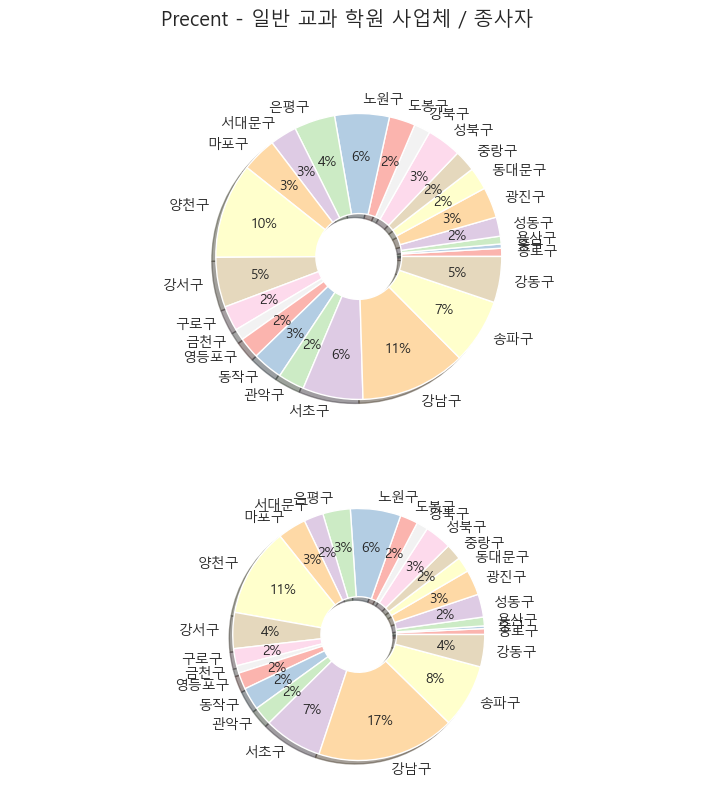

In [162]:
# Precent - 일반 교과 학원 사업체 / 종사자
def custom_autopct(pct):
  return ('%d%%' % pct) if pct > 2 else '' # 2프로 이상인 컬럼만 표시
# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(9, 9)
fig.suptitle("Precent - 일반 교과 학원 사업체 / 종사자")

ax1.pie(seoul_business_copy['일반 교과 학원 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['일반 교과 학원 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

In [154]:
b = seoul_business_copy[['자치구','일반 교과 학원 - 사업체']]
b

,자치구,일반 교과 학원 - 사업체
1,종로구,0.923516
2,중구,0.478549
3,용산구,0.873142
4,성동구,2.166065
5,광진구,3.467383
6,동대문구,2.535471
7,중랑구,2.417933
8,성북구,3.895559
9,강북구,1.847032
10,도봉구,2.946856


In [156]:
a.columns = ['자치구', '이동인구(합)']

In [159]:
pop = pd.merge(a, b, on='자치구',  how='inner')
pop

,자치구,이동인구(합),일반 교과 학원 - 사업체
0,강남구,1073.857171,11.972127
1,강동구,887.028074,5.205272
2,강북구,268.402969,1.847032
3,강서구,675.254398,5.641844
4,관악구,349.376977,2.972043
5,광진구,437.310821,3.467383
6,구로구,323.022610,2.820922
7,금천구,155.101618,1.284527
8,노원구,764.258472,6.170767
9,도봉구,263.546286,2.946856


In [160]:
import scipy.stats as spst

result = spst.pearsonr(pop['이동인구(합)'],pop['일반 교과 학원 - 사업체'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.8365165889133666, p-value : 1.8949139263390707e-07


<AxesSubplot:xlabel='이동인구(합)'>

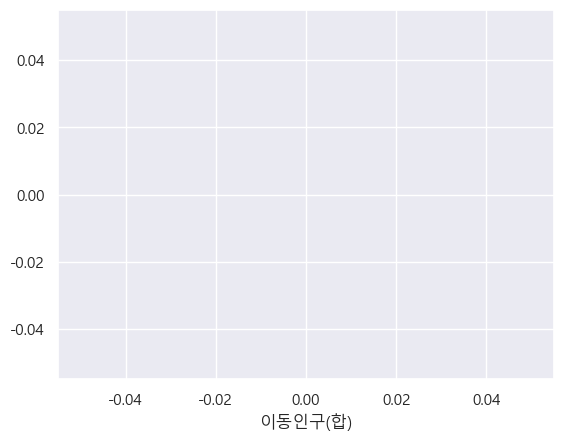

In [163]:
sns.lineplot(data = pop, x = '이동인구(합)')

In [53]:
# 요일별 이동 시각

# 출발 시군구 코드와 도착 시군구 코드가 같은 경우

# 출발 시군구 코드와 도착 시군구 코드가 다른 경우

# 평균 이동 시간 / 이동 인구

# 주말과 평일의 이동시간의 차이

# 이동유형에 따른 성별 / 나이

In [70]:
# 출발 시군구 코드와 도착 시군구 코드가 같은 경우
total_T = total.loc[(total['출발 시군구 코드'] == total['도착 시군구 코드'])]

* 평일 기준(월, 화, 수, 목, 금)
* 20 ~ 50대 : 출근시간 : 7 ~ 9 / 퇴근시간 : 17 ~ 19
* 10대 : 학원가는 시간(하교시간) 15 ~ 18 

In [105]:
total_20_50_work = total_T.loc[total_T['도착시간'].between(7,9) & total_T['나이대'].isin(['20 ~ 30대','40 ~ 50대']) | total_T['도착시간'].between(17,19) & total_T['나이대'].isin(['20 ~ 30대','40 ~ 50대'])]
total_20_50_work = total_20_50_work.loc[total_20_50_work['요일'].isin(['월','화','수','목','금'])]

In [107]:
total_10_aca = total_T.loc[total_T['도착시간'].between(15,18) & total_T['나이대'].isin(['10대'])]
total_10_aca = total_10_aca.loc[total_10_aca['요일'].isin(['월','화','수','목','금'])]

In [109]:
total_20_50_work.groupby('출발 시군구 코드').mean()['이동인구(합)']

출발 시군구 코드
강남구     941.337127
강동구     436.302505
강북구     173.717698
강서구     525.743935
관악구     345.556990
광진구     314.407072
구로구     279.809231
금천구     185.534763
노원구     357.543968
도봉구     143.157947
동대문구    281.552943
동작구     235.503226
마포구     451.836871
서대문구    270.147303
서초구     500.606539
성동구     290.992532
성북구     300.937708
송파구     776.954215
양천구     202.456968
영등포구    505.316370
용산구     234.441805
은평구     296.241801
종로구     257.998610
중구      289.167946
중랑구     236.978403
Name: 이동인구(합), dtype: float64

In [139]:
total_10_aca

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),나이대
244175,202212,월,15,종로구,종로구,F,0,HH,36,27.85,10대
244176,202212,월,15,종로구,종로구,F,0,EE,25,279.75,10대
244177,202212,월,15,종로구,종로구,F,0,HW,1,27.45,10대
244178,202212,월,15,종로구,종로구,F,0,HE,25,55.04,10대
244179,202212,월,15,종로구,종로구,F,0,WH,18,279.55,10대
...,...,...,...,...,...,...,...,...,...,...,...
1519675,202212,금,18,강동구,강동구,M,15,HE,41,1415.72,10대
1519676,202212,금,18,강동구,강동구,M,15,WE,46,221.42,10대
1519677,202212,금,18,강동구,강동구,M,15,HW,41,889.17,10대
1519678,202212,금,18,강동구,강동구,M,15,EW,39,176.17,10대


In [144]:
a = total_10_aca.groupby('출발 시군구 코드')['출발 시군구 코드','이동인구(합)'].mean()
a.reset_index(drop = False, inplace =True)

C:\Users\82107\AppData\Local\Temp\ipykernel_10300\1137848759.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a = total_10_aca.groupby('출발 시군구 코드')['출발 시군구 코드','이동인구(합)'].mean()


<AxesSubplot:xlabel='출발 시군구 코드', ylabel='이동인구(합)'>

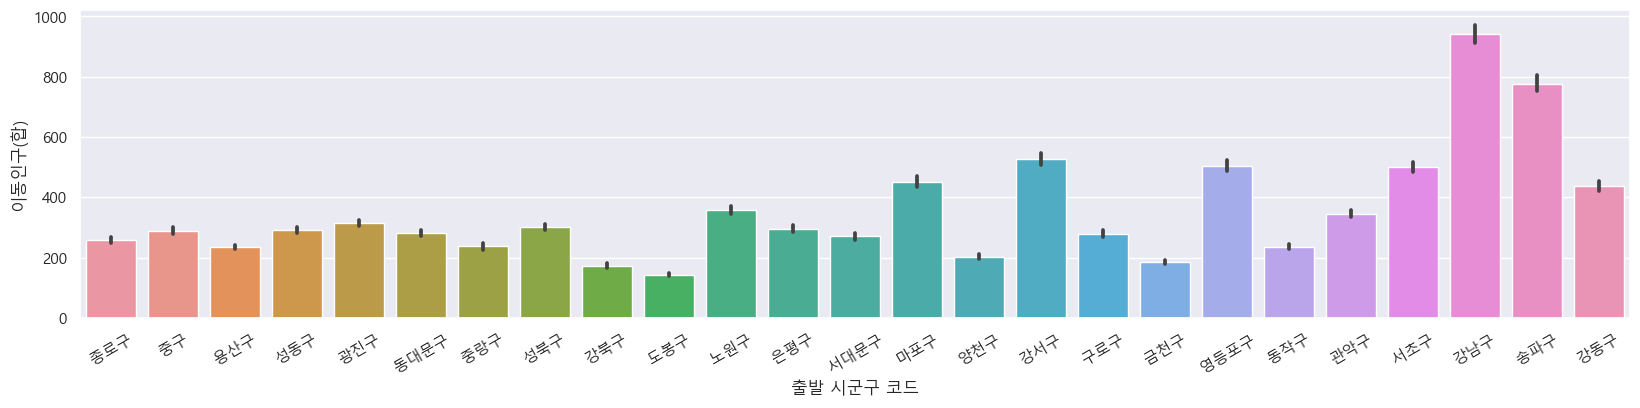

In [111]:
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.barplot(data = total_20_50_work, x = '출발 시군구 코드', y ='이동인구(합)')

<AxesSubplot:xlabel='출발 시군구 코드', ylabel='이동인구(합)'>

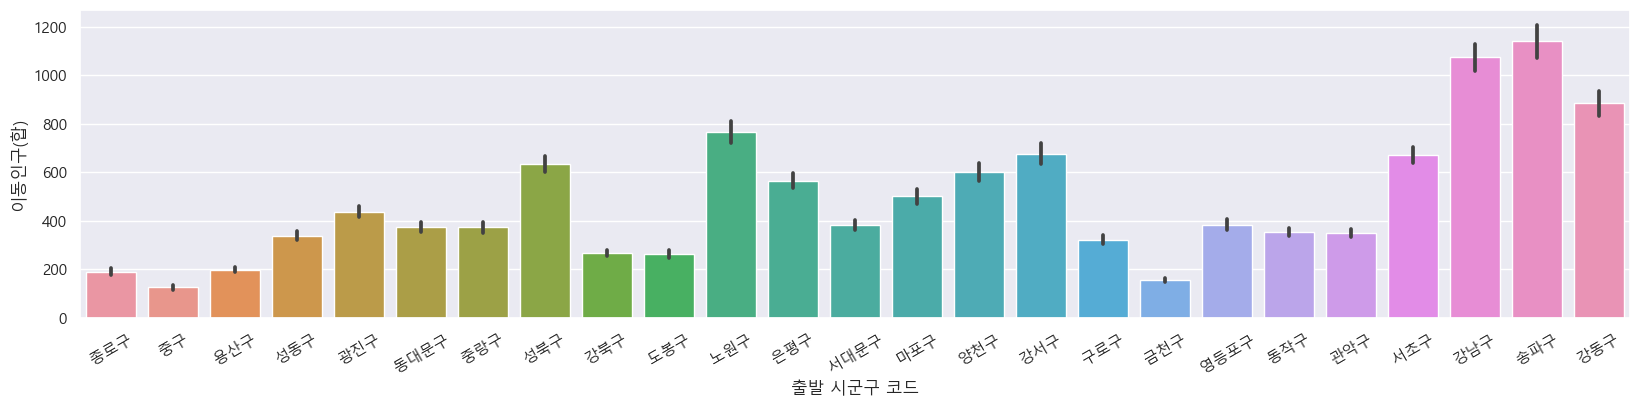

In [112]:
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.barplot(data = total_10_aca, x = '출발 시군구 코드', y ='이동인구(합)')

In [55]:
# 출발 시군구 코드와 도착 시군구 코드가 다른 경우
total_F = total.loc[(total['출발 시군구 코드'] != total['도착 시군구 코드'])]

In [56]:
# 요일 / 도착시간 / 나이 / 평균 이동 시간(분)
total_T = total_T.groupby(['요일', '도착시간','나이','나이대'], as_index = False).mean()

In [57]:
# 요일 / 도착시간 / 나이 / 평균 이동 시간(분)
total_F = total_F.groupby(['요일', '도착시간','나이','나이대'], as_index = False).mean()

<AxesSubplot:xlabel='도착시간', ylabel='평균 이동 시간(분)'>

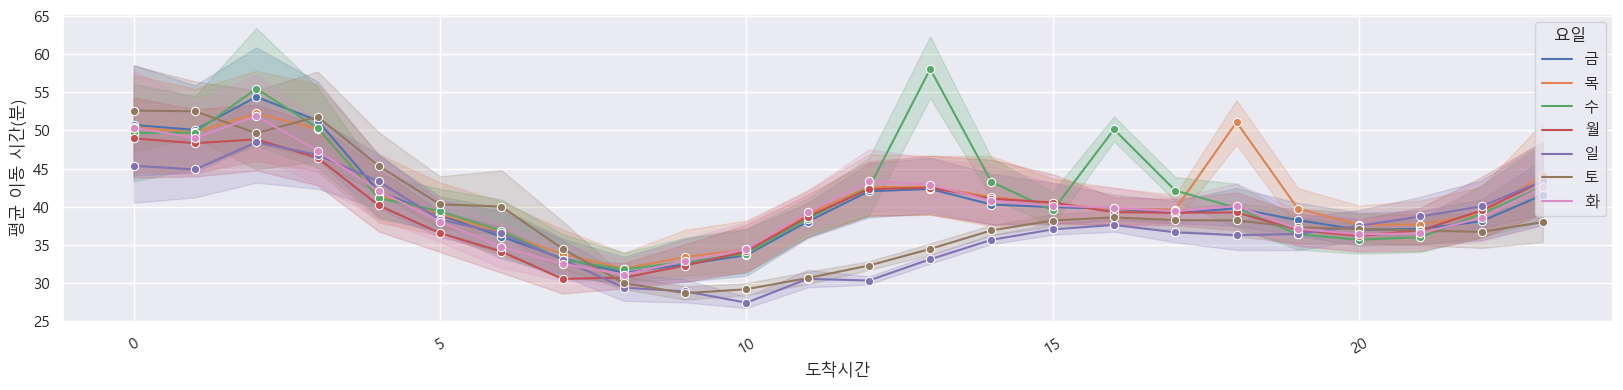

In [36]:
# 시간 - 요일별 평균 이동시간(시군구 코드가 같은 경우)
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_T, x = '도착시간', y = '평균 이동 시간(분)', hue = '요일', marker = 'o')

In [37]:
# 시군구 코드가 같은 경우 평균이동시간이 시군구 코드가 다른경우 보다 짧았으며, 특이사항은 수요일 13시, 16시경이 높으며, 목요일 17시경에도 평균 이동시간이 긴 것을 확인할 수 있다.

<AxesSubplot:xlabel='도착시간', ylabel='평균 이동 시간(분)'>

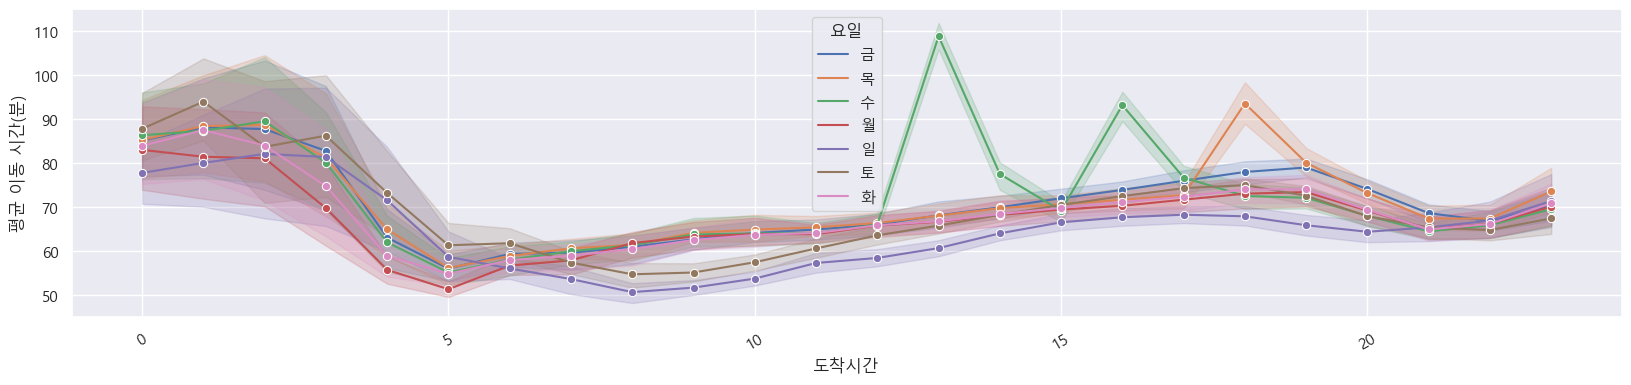

In [38]:
# 시간 - 요일별 평균 이동시간(시군구 코드가 다른 경우)
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_F, x = '도착시간', y = '평균 이동 시간(분)', hue = '요일', marker = 'o')

In [39]:
# 시군구 코드가 다른 경우도 마찬가지로 수요일 13시, 16시경이 높으며, 목요일 17시경에도 평균 이동시간이 긴 것을 확인할 수 있다.

<AxesSubplot:xlabel='도착시간', ylabel='이동인구(합)'>

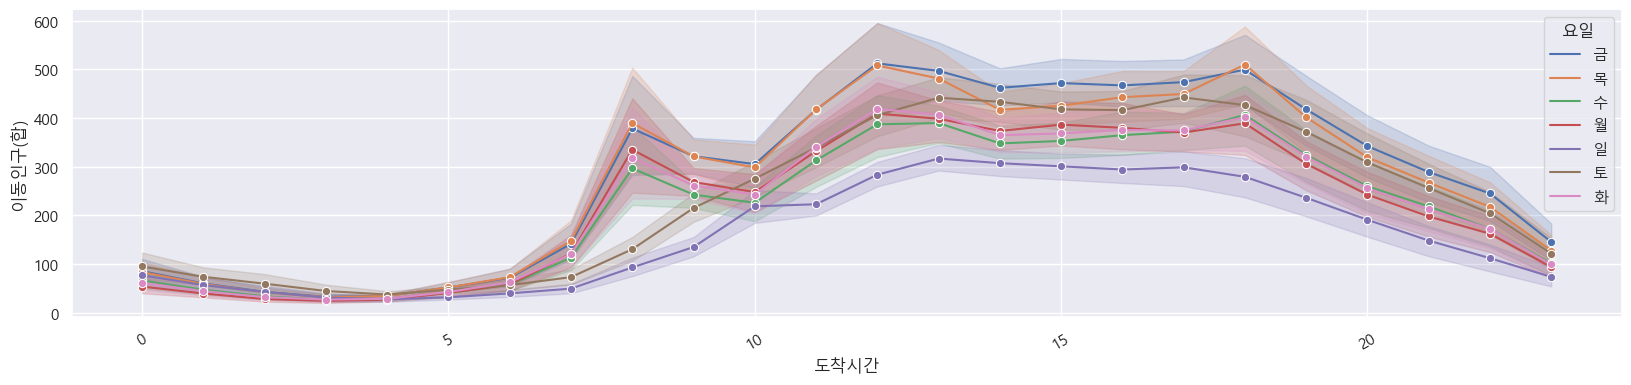

In [40]:
# 시간 - 요일별 평균 이동인구(시군구 코드가 같은 경우)
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_T, x = '도착시간', y = '이동인구(합)', hue = '요일', marker = 'o')

In [41]:
# 시군구 코드가 같은 경우 평균이동인구가 시군구 코드가 다른경우 보다 많았으며, 특이사항은 출근시간인 7 ~ 8시에 많으며 점심시간인 12시부터 퇴근시간이 18 ~ 19시까지 높은 것을 볼 수 있다.
# 주말인 토 / 일요일의 경우 출근시간의 이동인구가 적으며 가장 높은 시기가 점심시간인 것을 확인 할 수 있다.

<AxesSubplot:xlabel='도착시간', ylabel='이동인구(합)'>

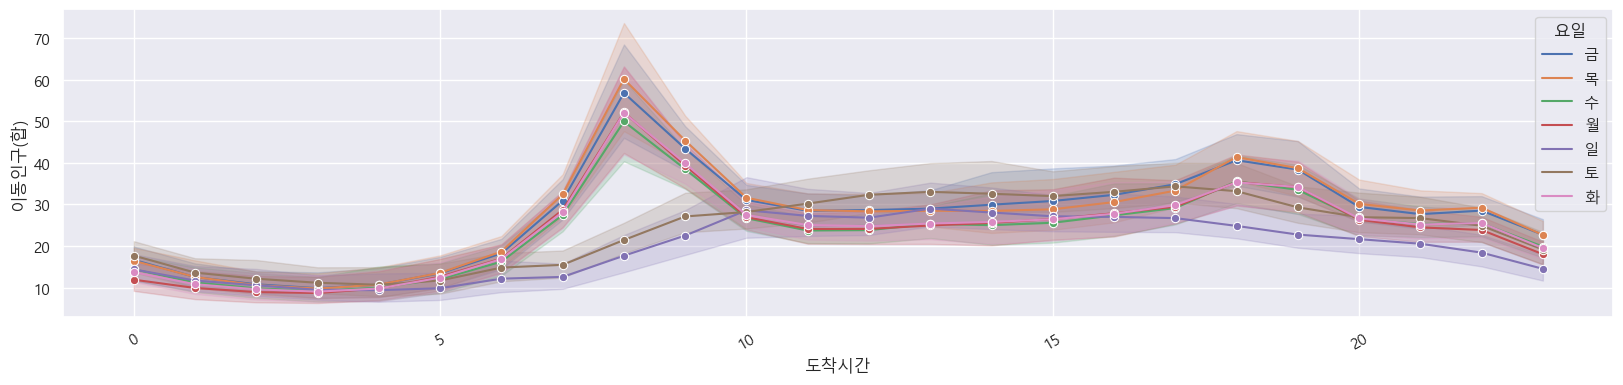

In [42]:
# 시간 - 요일별 평균 이동인구(시군구 코드가 다른 경우)
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_F, x = '도착시간', y = '이동인구(합)', hue = '요일', marker = 'o')

In [43]:
# 시군구 코드가 다른 경우 출근시간인 7 ~ 8시에 많으며 퇴근시간의 경우 출근시간보다 적은 것을 확인 할 수 있다.
# 시군구 코드가 다른 경우도 주말의 경우 출근시간의 이동인구가 낮은 것을 확인 할 수 있고, 점심시간이 가장 높은 것을 볼 수 있다.

In [44]:
# 요일 / 도착시간 / 나이 / 평균 이동 시간(분)
total_A = total.groupby(['요일', '도착시간','나이','이동유형','나이대'], as_index = False).mean()

<AxesSubplot:xlabel='도착시간', ylabel='평균 이동 시간(분)'>

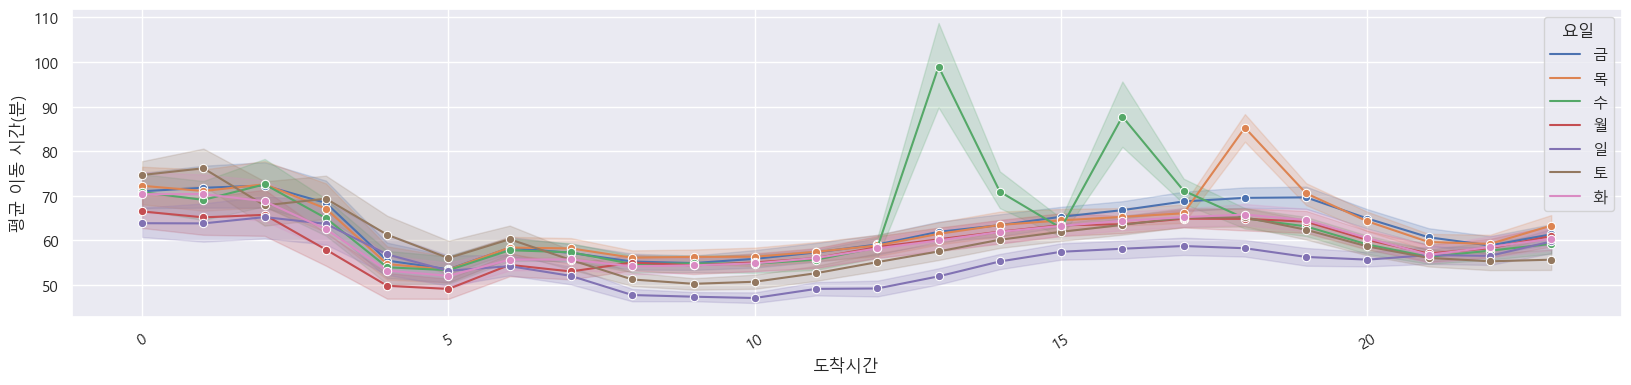

In [45]:
# 전체 요일별 이동 시간
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_A, x = '도착시간', y = '평균 이동 시간(분)', hue = '요일', marker = 'o')

In [46]:
total_A['나이'].value_counts()

10    1512
15    1512
20    1512
25    1512
30    1512
35    1512
40    1512
45    1512
50    1512
55    1512
60    1512
65    1512
70    1512
75    1512
80    1512
0     1511
Name: 나이, dtype: int64

In [47]:
# 나이 그룹화 진행
# 10 대 / 20 ~ 30대 / 40 ~ 50대 / 60대 이상

<AxesSubplot:xlabel='도착시간', ylabel='평균 이동 시간(분)'>

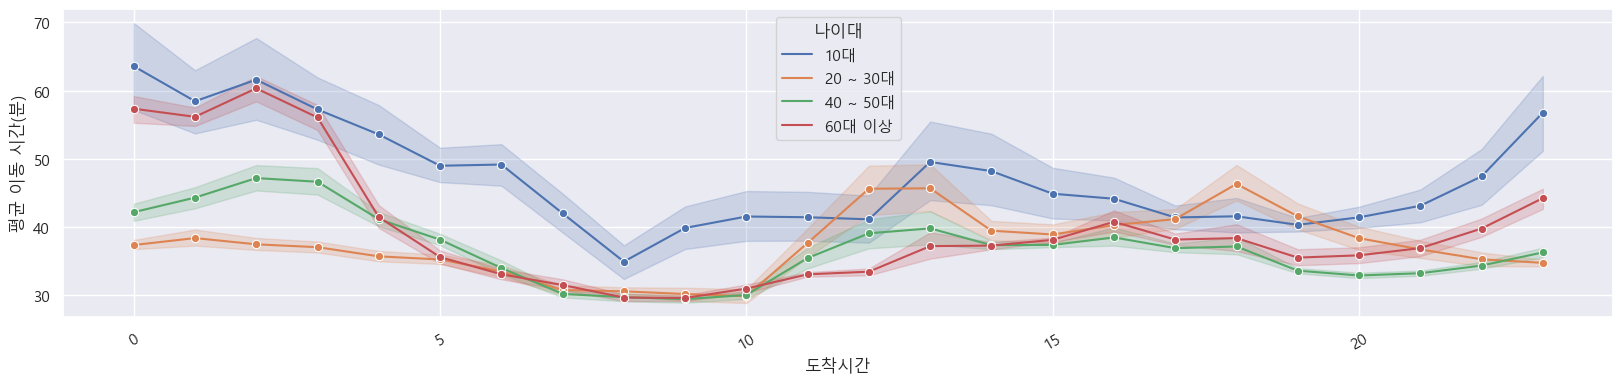

In [58]:
# 전체 나이별 이동 시간 - 같은 지역
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_T, x = '도착시간', y = '평균 이동 시간(분)', hue = '나이대', marker = 'o')

<AxesSubplot:xlabel='도착시간', ylabel='이동인구(합)'>

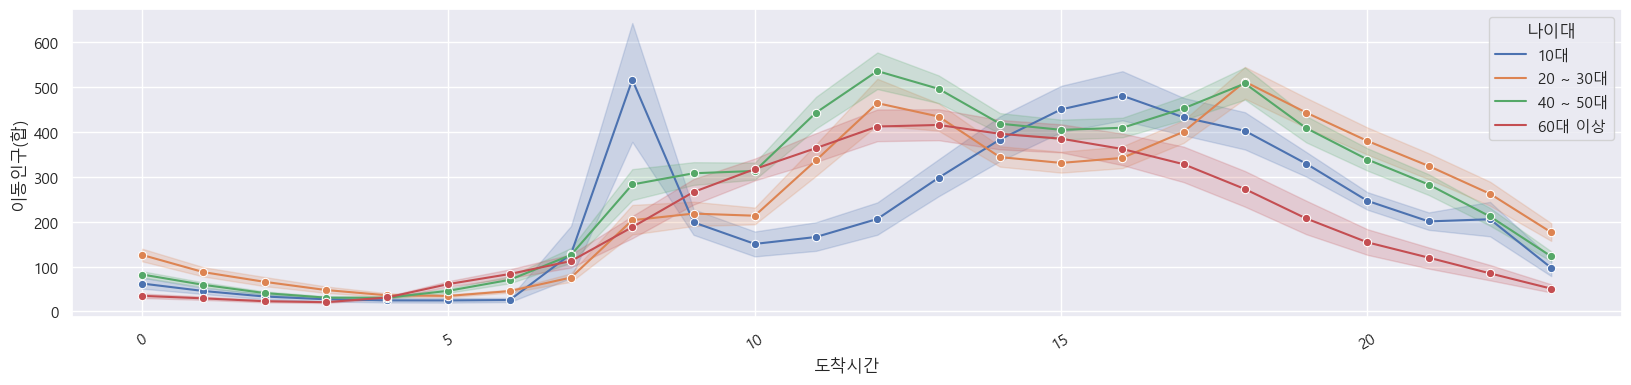

In [62]:
# 전체 나이별 이동인구 - 같은지역
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_T, x = '도착시간', y = '이동인구(합)', hue = '나이대', marker = 'o')

<AxesSubplot:xlabel='도착시간', ylabel='평균 이동 시간(분)'>

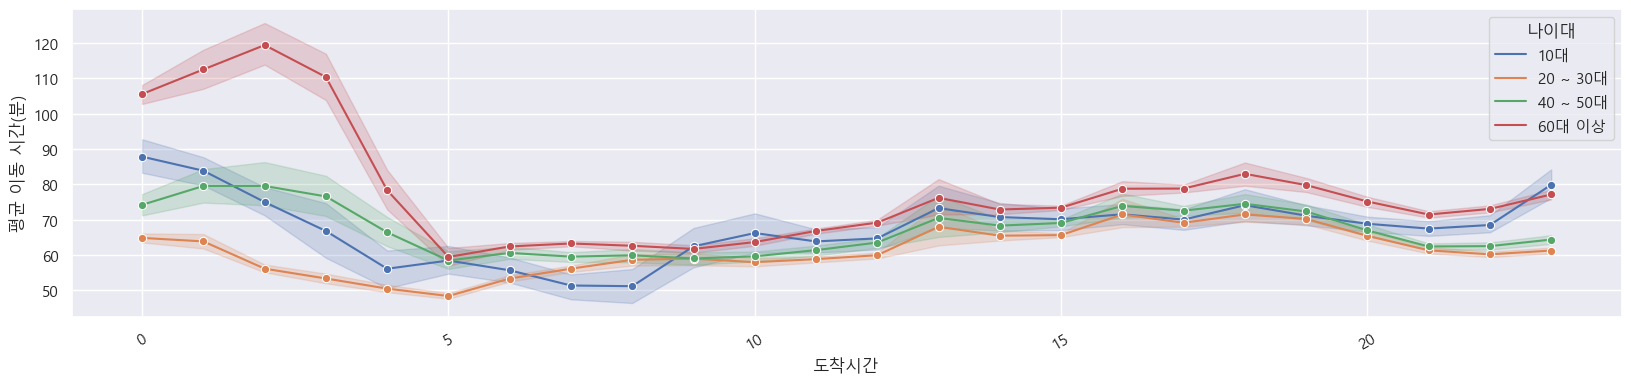

In [63]:
# 전체 나이별 이동 시간 - 다른 지역
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_F, x = '도착시간', y = '평균 이동 시간(분)', hue = '나이대', marker = 'o')

<AxesSubplot:xlabel='도착시간', ylabel='이동인구(합)'>

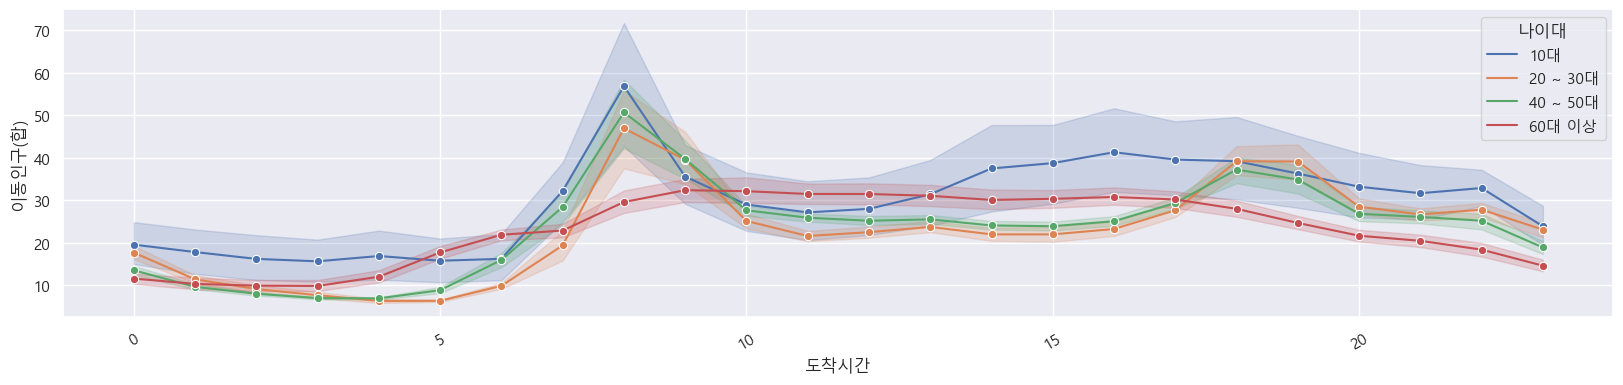

In [64]:
# 전체 나이별 이동인구 - 다른지역
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_F, x = '도착시간', y = '이동인구(합)', hue = '나이대', marker = 'o')

<AxesSubplot:xlabel='도착시간', ylabel='평균 이동 시간(분)'>

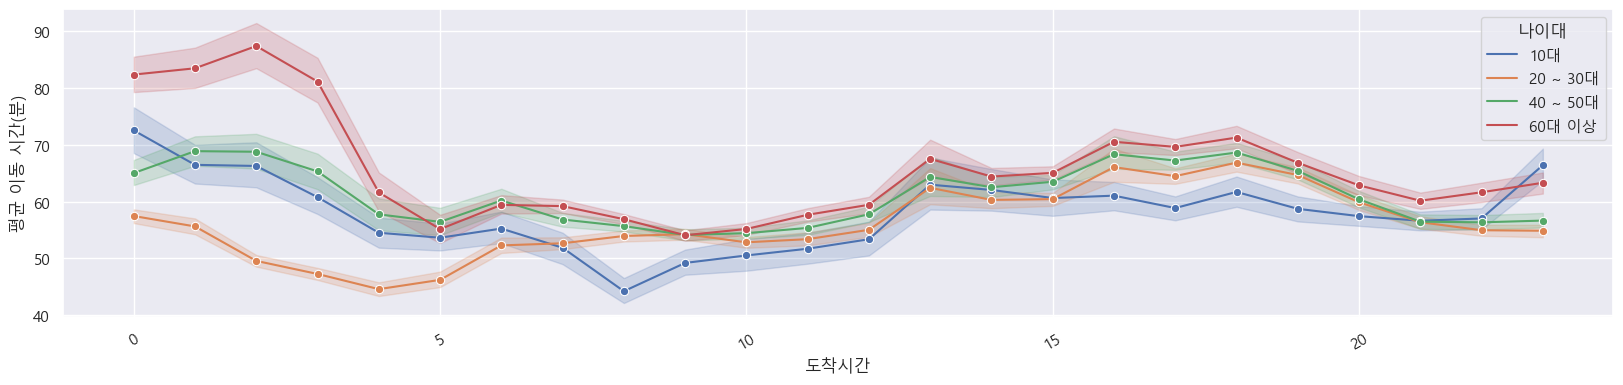

In [65]:
# 전체 나이별 이동 시간
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_A, x = '도착시간', y = '평균 이동 시간(분)', hue = '나이대', marker = 'o')

<AxesSubplot:xlabel='도착시간', ylabel='이동인구(합)'>

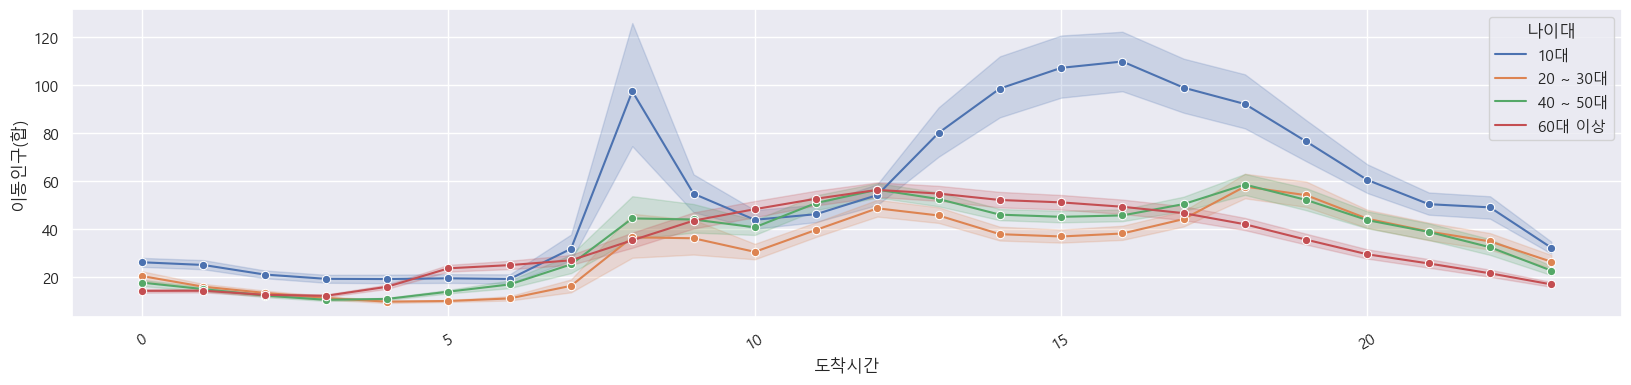

In [61]:
# 전체 나이별 이동 평균
plt.figure(figsize = (20, 4))
plt.xticks(rotation = 30)
sns.lineplot(data = total_A, x = '도착시간', y = '이동인구(합)', hue = '나이대', marker = 'o')

In [ ]:
# 나이별 이동 시간과 이동 평균을 확인 했을 때, 심야시간인 0 ~ 3시에 

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---